## LINEAR REGRESSION
\begin{equation}
\hat{y} = \Theta_0 + \Theta_{1}x_1 + \Theta_{2}x_2 + ... + \Theta_{n}x_n
\end{equation}

\begin{equation}
\hat\Theta = (X^TX)^{-1}X^Ty
\end{equation}

In [93]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Matrix = List[List[float]]

In [117]:
class LinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X: Matrix, y: List[float]):
        assert len(X) == len(y), 'length of Matix X and vector y has to match'
        
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta_ = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = self.theta_[0]
        self.coef_ = self.theta_[1:]
    
    def predict(self, X: Matrix) -> List[float]:
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)

In [123]:
X = 2 * np.random.rand(100, 1)
y = 3 + 5 * X + np.random.randn(100, 1)

In [124]:
regressor = LinearRegression()
regressor.fit(X, y)

In [125]:
regressor.theta_

array([[3.20717813],
       [4.82801093]])

In [126]:
X_new = [0, 2]
y_pred = regressor.predict(X_new)
y_pred

array([[ 3.20717813],
       [12.86319998]])

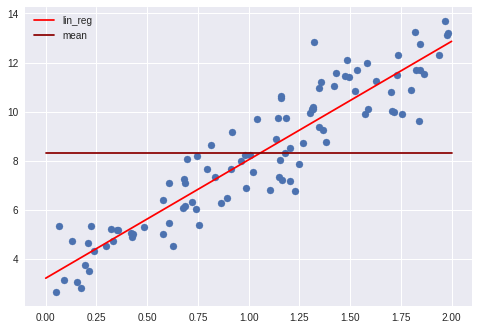

In [130]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, color='red', label='lin_reg')
plt.plot([0, 2], [y.mean()] * 2, color='darkred', label='mean')
plt.legend()
plt.show()

# GRADIENT DESCENT

\begin{equation}
\nabla_\Theta MSE(\Theta) = \frac{2}{m}X^T(X\Theta - y)
\end{equation}

\begin{equation}
\Theta^{next step} = \Theta - \eta\nabla_{\Theta} MSE(\Theta)
\end{equation}

* eta is learning rate

In [141]:
eta = 0.1
n_iterations = 1000
m = 100

X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

# random initialization of theta
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [142]:
theta

array([[3.02430668],
       [4.01414387]])

In [164]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def fit(self, X: Matrix, y: List[float]):
        assert len(X) == len(y), 'lenght of features (X) is not equal to the length of labels (y)'
        self.theta_ = np.random.randn(len(X[0]) + 1, 1)
        X_b = np.c_[np.ones((len(X), 1)), X]
        
        for i in range(self.n_iterations):
            gradients = 2 / m * X_b.T.dot(X_b.dot(self.theta_) - y)
            self.theta_ -= self.learning_rate * gradients
    
    def predict(X: Matrix) -> List[float]:
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)

In [188]:
regressor = LinearRegressionGD(n_iterations=1000)
regressor.fit(X, y)

In [189]:
regressor.theta_

array([[3.00768154],
       [4.02806946]])

# STOCHASTIC GRADIENT DESCENT

In [255]:
class LinearRegressionSGD:
    def __init__(self, n_iter: int = 50, l_rate: float = 0.1, t0: int = 5, t1: int = 50):
        self.n_iter = n_iter
        self.l_rate = l_rate
        self.t0 = t0
        self.t1 = t1
        
    def _learning_schedule(self, t):
            return self.t0 / (t + self.t1)
        
    def fit(self, X: Matrix, y: List[float]):
        assert len(X) == len(y), 'length of X and y must match'
        
        theta = np.random.randn(len(X[0]) + 1, 1)
        X_b = np.c_[np.ones((len(X), 1)), X]
        
        for epoch in range(self.n_iter):
            for i in range(len(X)):
                random_index = np.random.randint(len(X))
                xi = X_b[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                gradients = 2 / m * xi.T.dot(xi.dot(theta) - yi)
                self.l_rate = self._learning_schedule(epoch * m + i)
                theta -= self.l_rate * gradients
                
        self.best_params_ = theta
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
        
    def predict(self, X: Matrix, y: List[float]) -> List[float]:
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.best_params_)

In [256]:
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

In [257]:
sgd_regressor = LinearRegressionSGD(n_iter=70)
sgd_regressor.fit(X, y)
sgd_regressor.best_params_

array([[3.06686923],
       [1.95682308]])

# POLYNOMIAL REGRESSION

In [301]:
m = 100
X = np.random.rand(m, 1) * 6 - 3
y = 0.5 + X**2 + X + 2 + np.random.randn(m, 1)

In [265]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [266]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [272]:
lin_reg.intercept_, lin_reg.coef_

(array([2.55467995]), array([[0.        , 1.01426393, 1.00793678]]))

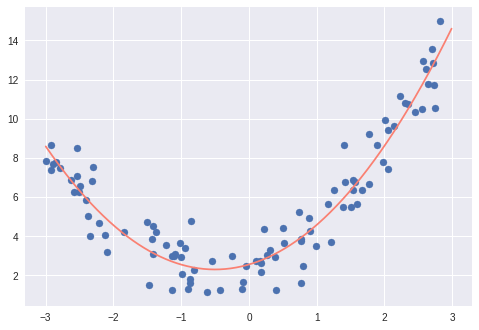

In [283]:
line_X = (np.array(range(-300, 300)) / 100).reshape((-1, 1))
line_X_poly = poly_features.transform(line_X)
y_pred = lin_reg.predict(line_X_poly)

plt.scatter(X, y)
plt.plot(line_X, y_pred, color='salmon')
plt.show()

### LEARNING CURVES

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, test_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_pred)))
        test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
        
    plt.plot(train_errors, 'r', label='train')
    plt.plot(test_errors, 'b-', label='test')
    plt.legend()
    plt.show()

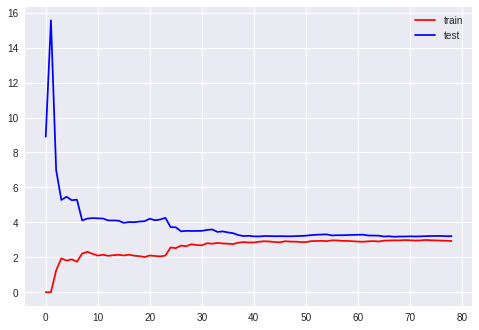

In [302]:
plot_learning_curve(LinearRegression(), X, y)

# This is example where model is underfitting the data. 

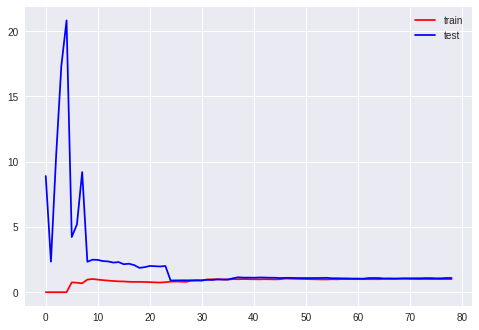

In [310]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('reg', LinearRegression())
])

plot_learning_curve(polynomial_regression, X, y)

# here the model is overfitting the data

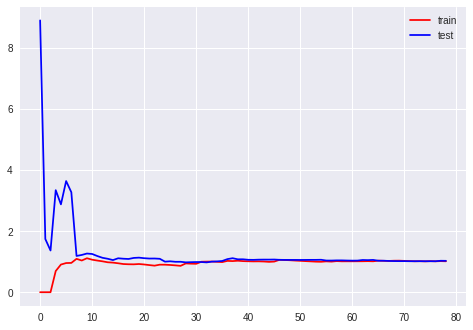

In [307]:
polynomial_regression_2 = Pipeline([
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
])

plot_learning_curve(polynomial_regression_2, X, y)

# EARLY STOPPING

In [319]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import clone

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(penalty=None, max_iter=1, warm_start=True, eta0=0.0005,
                       tol=-np.infty, learning_rate='constant')

minimum_test_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_test_pred = sgd_reg.predict(X_test_poly_scaled)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(model)

/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversio

/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversio

/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversio

/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matus/documents/machine_learning/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversio

In [320]:
best_epoch, minimum_test_error

(111, 1.275874863258708)

# LOGISTIC REGRESSION

In [323]:
from sklearn import datasets

iris = datasets.load_iris()

In [324]:
X = iris['data'][:, 3:] # corresponds to petal width
y = (iris['target'] == 2).astype(int) # 1 if iris virginica, 0 otherwise

In [326]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [328]:
X_new = np.linspace(0, 3, 1000).reshape((-1, 1))
y_proba = log_reg.predict_proba(X_new)

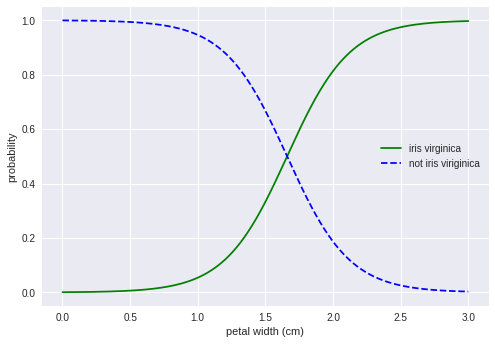

In [334]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not iris viriginica')
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.legend()
plt.show()